In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
house_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
house_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
test_id = house_test['Id']

In [4]:
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
#Assigning numerical values for nominial train data
Numlist1 = ['BsmtQual','BsmtCond', 'FireplaceQu','GarageQual', 'GarageCond']
Numlist2 = ['BsmtExposure']
Numlist3 = ['BsmtFinType1' , 'BsmtFinType2']
Numlist4 = ['PoolQC']
Numlist5 = ['Fence']
Numlist6 = ['ExterQual','ExterCond','HeatingQC', 'KitchenQual']
Numlist7 = ['LotShape']
Numlist8 = ['LandSlope']
Numlist9 = ['Functional']
Numlist10 = ['GarageFinish']
def numeric_map1(x):
    return x.map({'Po' : 1 ,'Fa' : 2 , 'TA' : 3 , 'Gd' : 4 , 'Ex' : 5 , np.nan : 0})
def numeric_map2(y):
    return y.map({'No' : 1 ,'Mn' : 2 , 'Av' : 3 , 'Gd' : 4 , np.nan : 0})
def numeric_map3(z):
    return z.map({'Unf' : 1 ,'LwQ' : 2 , 'Rec' : 3 , 'BLQ' : 4 ,'ALQ': 5, 'GLQ': 6, np.nan : 0})
def numeric_map4(a):
    return a.map({'Fa' : 1 ,'TA' : 2 , 'Gd' : 3 , 'Ex' : 4 , np.nan : 0})
def numeric_map5(b):
    return b.map({'MnWw' : 1 ,'GdWo' : 2 , 'MnPrv' : 3 , 'GdPrv' : 4 , np.nan : 0})
def numeric_map6(c):
    return c.map({'Po' : 1 ,'Fa' : 2 , 'TA' : 3 , 'Gd' : 4 , 'Ex' : 5 })
def numeric_map7(d):
    return d.map({'IR3' : 1 ,'IR2' : 2 , 'IR1' : 3 , 'Reg' : 4 })
def numeric_map8(e):
    return e.map({'Sev' : 1 ,'Mod' : 2 , 'Gtl' : 3 })
def numeric_map9(f):
    return f.map({'Sal' : 1 ,'Sev' : 2 , 'Maj2' : 3 ,'Maj1' : 4, 'Mod' : 5, 'Min2' : 6 , 'Min1' : 7, 'Typ' : 8})
def numeric_map10(g):
    return g.map({'Unf' : 1 ,'RFn' : 2 , 'Fin' : 3 , np.nan : 0})
house_train[Numlist1] = house_train[Numlist1].apply(numeric_map1)
house_train[Numlist2] = house_train[Numlist2].apply(numeric_map2)
house_train[Numlist3] = house_train[Numlist3].apply(numeric_map3)
house_train[Numlist4] = house_train[Numlist4].apply(numeric_map4)
house_train[Numlist5] = house_train[Numlist5].apply(numeric_map5)
house_train[Numlist6] = house_train[Numlist6].apply(numeric_map6)
house_train[Numlist7] = house_train[Numlist7].apply(numeric_map7)
house_train[Numlist8] = house_train[Numlist8].apply(numeric_map8)
house_train[Numlist9] = house_train[Numlist9].apply(numeric_map9)
house_train[Numlist10] = house_train[Numlist10].apply(numeric_map10)

In [6]:
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,4,Lvl,AllPub,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,4,Lvl,AllPub,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,3,Lvl,AllPub,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,3,Lvl,AllPub,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,3,Lvl,AllPub,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,4,Lvl,AllPub,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,4,Lvl,AllPub,...,0,0,3,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,4,Lvl,AllPub,...,0,0,4,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,4,Lvl,AllPub,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [7]:
house_train = house_train.drop(['Id'] , axis =1)
house_test = house_test.drop(['Id'] , axis =1)

In [8]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
columns = house_train.columns
type(list(columns))
house_train['Fence'].dtype!= object

True

In [10]:
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
# Extracting only numeric features
numeric_columns = []
for column in columns:
    if house_train[column].dtype != object :
        numeric_columns.append(column)
        
numeric_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
train_data = house_train[numeric_columns]

In [13]:
# describe the NAN Values
train_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
LotShape           0
LandSlope          0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
ExterQual          0
ExterCond          0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch  

# I'll fill the NAN Values by the median


In [14]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
train_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
LotShape         0
LandSlope        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscVal          0
MoSold      

# Check if there's any infinte feature because it makes alot of problems while training

In [18]:
np.isfinite(train_data.any())

MSSubClass       True
LotFrontage      True
LotArea          True
LotShape         True
LandSlope        True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
ExterQual        True
ExterCond        True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinSF1       True
BsmtFinType2     True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
HeatingQC        True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
KitchenQual      True
TotRmsAbvGrd     True
Functional       True
Fireplaces       True
FireplaceQu      True
GarageYrBlt      True
GarageFinish     True
GarageCars       True
GarageArea       True
GarageQual       True
GarageCond       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPo

In [19]:
train_x = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1]

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [21]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

In [22]:
train_x , train_y = shuffle(train_x,train_y,random_state = 42)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.25, random_state=42)

# invastigate the skewness of the data
# (It's a common issue in house pricing problem because some houses will be very expensive and other houses very cheap


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

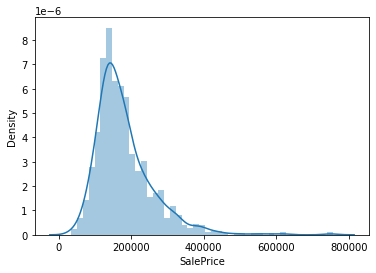

In [25]:
import seaborn as sns
sns.distplot(y_train)

# will take the log of the data to make it less skewed

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

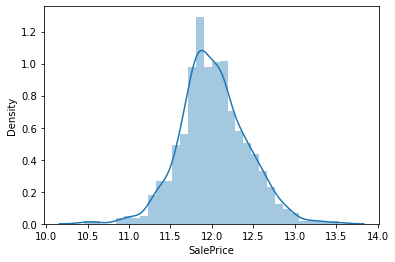

In [26]:
y_train_l = np.log1p(y_train)
sns.distplot(y_train_l)

In [27]:
pd.DataFrame(y_train).head(3)

,SalePrice
848,240000
1389,131000
201,171500


In [28]:
pd.DataFrame(y_train_l).head(3)

,SalePrice
848,12.388398
1389,11.782960
201,12.052344


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
model1= LinearRegression()
model1.fit(X_train,y_train_l)

train_pred = np.expm1(model1.predict(X_train))
valid_pred = np.expm1(model1.predict(X_valid))

print('Score train: ', model1.score(X_train,y_train_l))
print('Score train: ', r2_score(y_train,train_pred))
print('Score valid', r2_score(y_valid,valid_pred))

Score train:  0.8745081831623165
Score train:  0.8126854551993121
Score valid 0.9003462585969509


In [31]:
print('RMSE for train: ', mean_squared_error(y_train,train_pred, squared=False))
print('RMSE for validation: ', mean_squared_error(y_valid,valid_pred,squared=False))

RMSE for train:  34897.64996454475
RMSE for validation:  23876.246876758196


In [32]:
y_train

848     240000
1389    131000
201     171500
668     168000
985     125000
         ...  
773     114500
920     201000
627     153000
828     185000
902     180000
Name: SalePrice, Length: 1095, dtype: int64

# if we didn't get the log of the train labels we may get  better r2_score on the train data but you will find a worse r2_score on the validation data... give it a try

# Test another models (SVM)

In [33]:
from sklearn.svm import SVR

In [34]:
svr_linear = SVR(kernel = 'linear' , C =1)
svr_linear.fit(X_train,y_train_l)

svr_pr = np.expm1(svr_linear.predict(X_train))
svr_pr_val =  np.expm1(svr_linear.predict(X_valid))

print('Score for train', svr_linear.score(X_train,y_train_l))
print('Score for train',r2_score(y_train,svr_pr))
print('Score for validation',r2_score(y_valid,svr_pr_val))

Score for train 0.8507789364199128
Score for train 0.046486732843194156
Score for validation 0.918173126124719


In [35]:
print('RMSE for train', mean_squared_error(y_train,svr_pr,squared=False))
print('RMSE for valid:', mean_squared_error(y_valid,svr_pr_val,squared=False))

RMSE for train 78736.08230624447
RMSE for valid: 21635.51494946874


# very weird scores on the train data ! 

# Try diffrent kernels

In [36]:
svr_poly = SVR(kernel = 'poly' , C =0.06, degree = 3)
svr_poly.fit(X_train,y_train_l)

pr2 = np.expm1(svr_poly.predict(X_train))
val2 = np.expm1(svr_poly.predict(X_valid))



In [37]:
print('RMSE for train: ', mean_squared_error(y_train,pr2,squared=False))
print('RMSE for valid: ', mean_squared_error(y_valid,val2,squared=False))

RMSE for train:  44320.27233163105
RMSE for valid:  34154.360832910876


In [38]:
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train,y_train_l)

pr3 = np.expm1(svr_rbf.predict(X_train))
val3 = np.expm1(svr_rbf.predict(X_valid))

print('Score train', r2_score(y_train,pr3))
print('Score val: ', r2_score(y_valid,val3))

Score train 0.9533281492119873
Score val:  0.8593942919425448


In [39]:
print('RMSE for train: ', mean_squared_error(y_train,pr3,squared=False))
print('RMSE for valid: ', mean_squared_error(y_valid,val3,squared=False))

RMSE for train:  17419.590574391645
RMSE for valid:  28360.947269520984


# I'll try SGDRegressor and Ridge and Lasso models to see wether they get more accurate than SVR or not

In [40]:
from sklearn.linear_model import SGDRegressor, Ridge, Lasso

# SGD

In [41]:
SGD = SGDRegressor(alpha=0.09)
SGD.fit(X_train,y_train_l)

pr4 = np.expm1(SGD.predict(X_train))
val4 = np.expm1(SGD.predict(X_valid))

print('Score train', r2_score(y_train,pr4))
print('Score val: ', r2_score(y_valid,val4))

Score train 0.7826574672012949
Score val:  0.9038946495952943


In [42]:
print('RMSE for train: ', mean_squared_error(y_train,pr4,squared=False))
print('RMSE for valid: ', mean_squared_error(y_valid,val4,squared=False))

RMSE for train:  37590.90604014994
RMSE for valid:  23447.3107798304


# Ridge

In [43]:
ri = Ridge(alpha=1)
ri.fit(X_train,y_train_l)

pr5 = np.expm1(ri.predict(X_train))
val5 = np.expm1(ri.predict(X_valid))

print('Score train', r2_score(y_train,pr5))
print('Score val: ', r2_score(y_valid,val5))

Score train 0.812638382959105
Score val:  0.9003395940732806


In [44]:
print('RMSE for train: ', mean_squared_error(y_train,pr5,squared=False))
print('RMSE for valid: ', mean_squared_error(y_valid,val5,squared=False))

RMSE for train:  34902.03458767428
RMSE for valid:  23877.045246944286


# Lasso

In [45]:
la = Lasso(alpha=0.001)
la.fit(X_train,y_train_l)

pr6 = np.expm1(la.predict(X_train))
val6 = np.expm1(la.predict(X_valid))

print('Score train', r2_score(y_train,pr6))
print('Score val: ', r2_score(y_valid,val6))

Score train 0.8052607535510697
Score val:  0.9016766165502377


In [46]:
print('RMSE for train: ', mean_squared_error(y_train,pr6,squared=False))
print('RMSE for valid: ', mean_squared_error(y_valid,val6,squared=False))

RMSE for train:  35582.55867416735
RMSE for valid:  23716.339789001016


# NN


In [47]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
# Neural Netwrok

DNN = keras.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = (54,)),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1, activation = 'relu')
])

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)

DNN.compile(
    optimizer = 'adam',
    loss = 'mse'
)

DNN.fit(
    X_train, y_train_l,
    batch_size = 80,
    epochs = 200,
    callbacks=[early_stopping]
)


2022-02-27 15:24:50.117859: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-02-27 15:24:50.278328: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 142.9404
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 140.0611
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 135.0637
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 127.9386
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 118.6605
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 106.4193
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 91.3453
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 75.3966
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 60.6993
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 48.5708
Epoch 11/200
14/14 [==============================] - 0s 2ms/step - loss: 38.8190
Epoch 12/200
14/14 [==============================] - 0s 2ms/step - loss: 31.1490
Epoch 13/200
14/14 

In [49]:
NN = np.expm1(DNN.predict(X_valid)) # Very bad approach

# So the highest accurecy model we found is SVR but maybe i wont use it because te weird value on train data

# I'll start to make the same preprocessing on the test data 

In [50]:
house_test[Numlist1] = house_test[Numlist1].apply(numeric_map1)
house_test[Numlist2] = house_test[Numlist2].apply(numeric_map2)
house_test[Numlist3] = house_test[Numlist3].apply(numeric_map3)
house_test[Numlist4] = house_test[Numlist4].apply(numeric_map4)
house_test[Numlist5] = house_test[Numlist5].apply(numeric_map5)
house_test[Numlist6] = house_test[Numlist6].apply(numeric_map6)
house_test[Numlist7] = house_test[Numlist7].apply(numeric_map7)
house_test[Numlist8] = house_test[Numlist8].apply(numeric_map8)
house_test[Numlist9] = house_test[Numlist9].apply(numeric_map9)
house_test[Numlist10] = house_test[Numlist10].apply(numeric_map10)

In [51]:
# Extracting only numeric features for test
columns_test = house_test.columns
numeric_columns_test = []
for column in columns_test:
    if house_test[column].dtype != object :
        numeric_columns_test.append(column)
        
numeric_columns_test

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold']

In [52]:
test_data = house_test[numeric_columns_test]

In [53]:
test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
LotShape           0
LandSlope          0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
ExterQual          0
ExterCond          0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Functional         2
Fireplaces         0
FireplaceQu        0
GarageYrBlt       78
GarageFinish       0
GarageCars         1
GarageArea         1
GarageQual         0
GarageCond         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch  

In [54]:
"""from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(test_data)
x = imputer.transform(test_data)"""

"from sklearn.impute import SimpleImputer\nimputer = SimpleImputer(missing_values=np.nan, strategy='median')\nimputer = imputer.fit(test_data)\nx = imputer.transform(test_data)"

In [55]:
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].median())
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].median())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].median())
test_data['BsmtFinSF2'] = test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].median())
test_data['BsmtUnfSF'] = test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].median())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].median())
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].median())
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].median())
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].median())
test_data['Functional'] = test_data['Functional'].fillna(test_data['Functional'].median())
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median())
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data['GarageCars'].median())
test_data['GarageArea'] = test_data['GarageArea'].fillna(test_data['GarageArea'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [56]:
test_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
LotShape         0
LandSlope        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscVal          0
MoSold      

# Before we start to predict from test data, let's train our selected model (SVR) on all the train data (before splitting)

In [57]:
train_y_l = np.log1p(train_y)

In [58]:
pd.DataFrame(train_y).head(3)

,SalePrice
892,154500
1105,325000
413,115000


In [59]:
pd.DataFrame(train_y_l).head(3)

,SalePrice
892,11.947956
1105,12.691584
413,11.652696


In [60]:
svr_final = SVR(kernel = 'linear' , C =1)
svr_final.fit(train_x , train_y_l)

svr_pr_final = np.expm1(svr_final.predict(train_x))

print('Score for train', svr_final.score(train_x , train_y_l))
print('Score for train',r2_score(train_y,svr_pr_final))

Score for train 0.8634374782440037
Score for train 0.2100590055768653


In [61]:
la_final = Lasso(alpha=0.001)
la_final.fit(train_x , train_y_l)

pr7 = np.expm1(la_final.predict(train_x))

print('Score train', r2_score(train_y,pr7))

Score train 0.8131999016681514


In [62]:
Ridge_final = Ridge(alpha=1)
Ridge_final.fit(train_x , train_y_l)

pr8 = np.expm1(Ridge_final.predict(train_x))

print('Score train', r2_score(train_y,pr8))

Score train 0.8179170087917603


In [63]:
test_data = scaler.fit_transform(test_data)

In [64]:
final = np.expm1(Ridge_final.predict(test_data))

In [65]:
pd.DataFrame(final).head(20)

,0
0,117550.985355
1,148606.981716
2,173591.832468
3,201253.555887
4,182283.209181
5,170929.905709
6,186368.076118
7,166007.216690
8,194867.537427
9,112652.479954


In [66]:
sub = pd.DataFrame({'id':test_id, 'SalePrice':final})

In [67]:
sub

,id,SalePrice
0,1461,117550.985355
1,1462,148606.981716
2,1463,173591.832468
3,1464,201253.555887
4,1465,182283.209181
...,...,...
1454,2915,93507.989732
1455,2916,96415.592734
1456,2917,177624.287944
1457,2918,114175.422167


In [68]:
sub.to_csv('Submission.csv',index=False)

In [69]:
sub.head(20)

,id,SalePrice
0,1461,117550.985355
1,1462,148606.981716
2,1463,173591.832468
3,1464,201253.555887
4,1465,182283.209181
5,1466,170929.905709
6,1467,186368.076118
7,1468,166007.216690
8,1469,194867.537427
9,1470,112652.479954
